In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import optuna

from backtest import backtest_dca

In [26]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


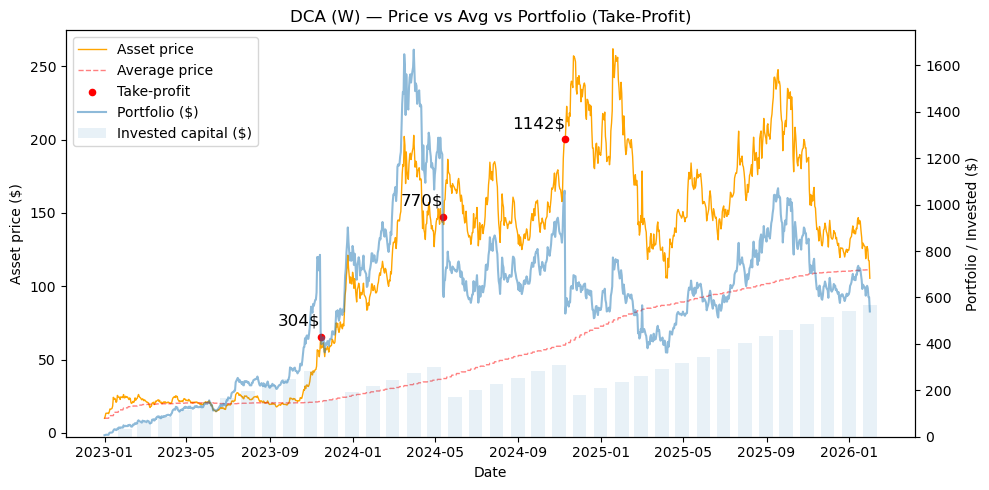

In [27]:
sol_prices = df_origin["SOL"]
invest_sum = 1000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [28]:
metric

{'Cash_spent': 1032,
 'Final_portfolio_value': 539,
 'Realized_profit': 1141,
 'Total_returns': 1605,
 'Total_equity': 2144,
 'Num_take_profits': 3}

In [29]:
res

,Portfolio,Invested,Avg_price,Realized_profit,Returns
2023-01-01,6.403846,6.410256,9.992165,0.000000,0.000000
2023-01-02,7.231927,6.410256,9.992165,0.000000,0.000000
2023-01-03,8.560583,6.410256,9.992165,0.000000,0.000000
2023-01-04,8.619005,6.410256,9.992165,0.000000,0.000000
2023-01-05,8.608879,6.410256,9.992165,0.000000,0.000000
...,...,...,...,...,...
2026-01-27,650.288584,568.910256,111.154920,1141.881079,1605.022105
2026-01-28,640.378017,568.910256,111.154920,1141.881079,1605.022105
2026-01-29,601.926811,568.910256,111.154920,1141.881079,1605.022105
2026-01-30,600.684481,568.910256,111.154920,1141.881079,1605.022105


# всі монети

In [30]:
# df = df_origin["2023-01-01":"2024-01-01"].copy()
# df = df_origin["2024-01-01":"2025-01-01"].copy()
# df = df_origin["2025-01-01":"2026-01-01"].copy()
# df = df_origin["2023-01-01":"2026-01-01"].copy()

df = df_origin.copy()
# df = df[['ETH', 'BNB', 'SOL', 'LINK', 'LTC', 'AVAX', 'DOT']]

df

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


========== BTC ==========


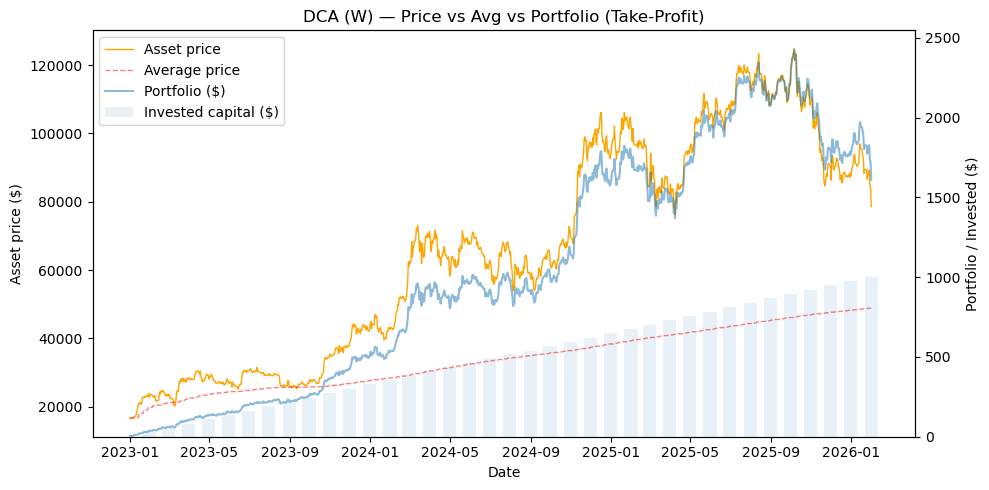

========== ETH ==========


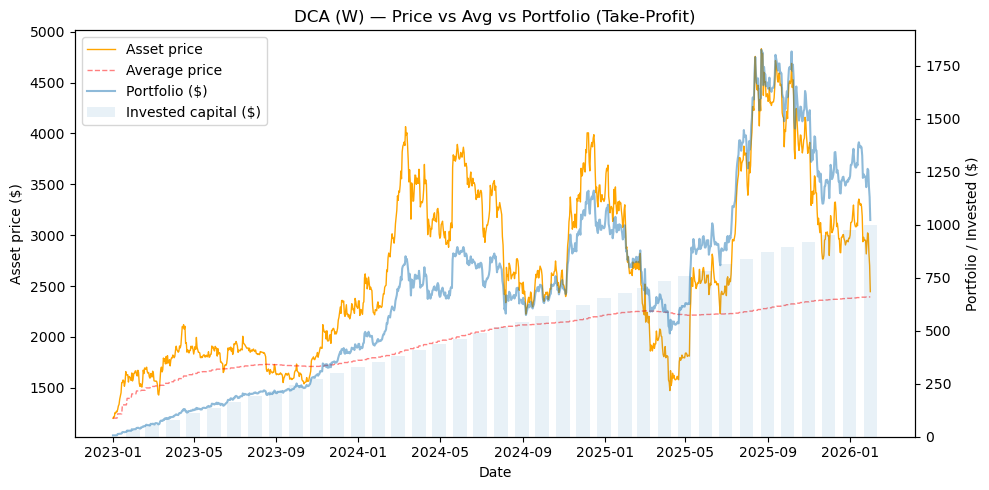

========== BNB ==========


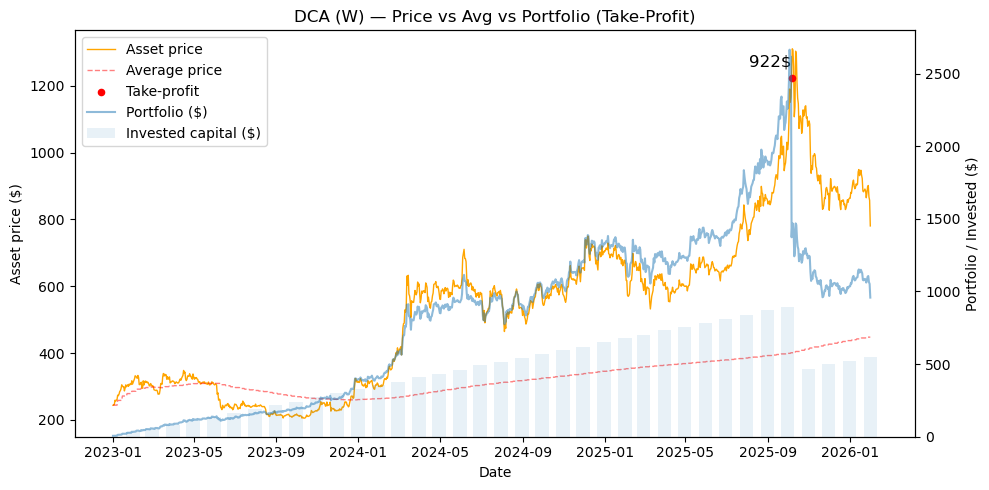

========== XRP ==========


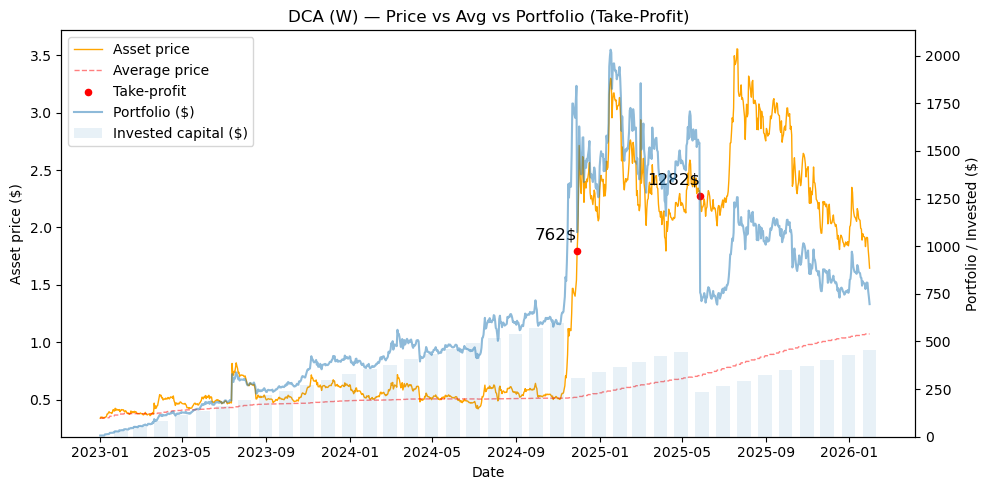

========== SOL ==========


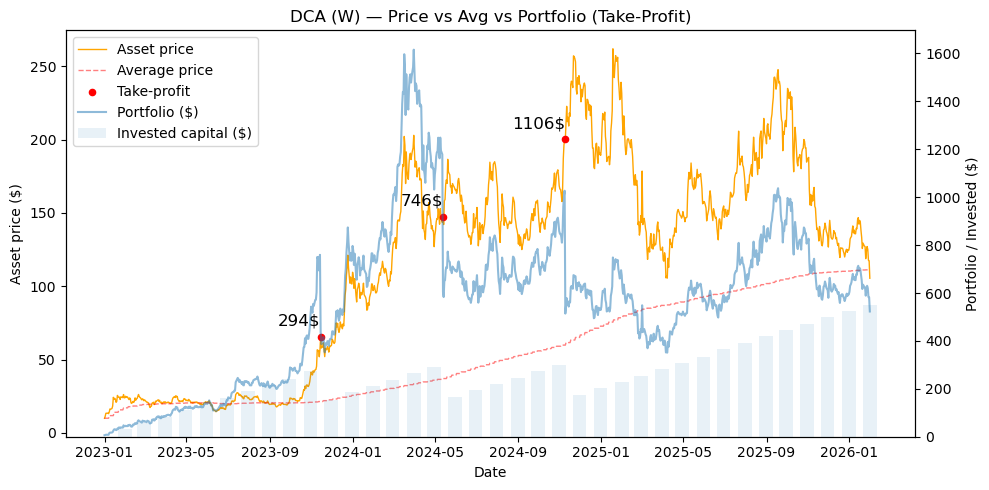

========== TRON ==========


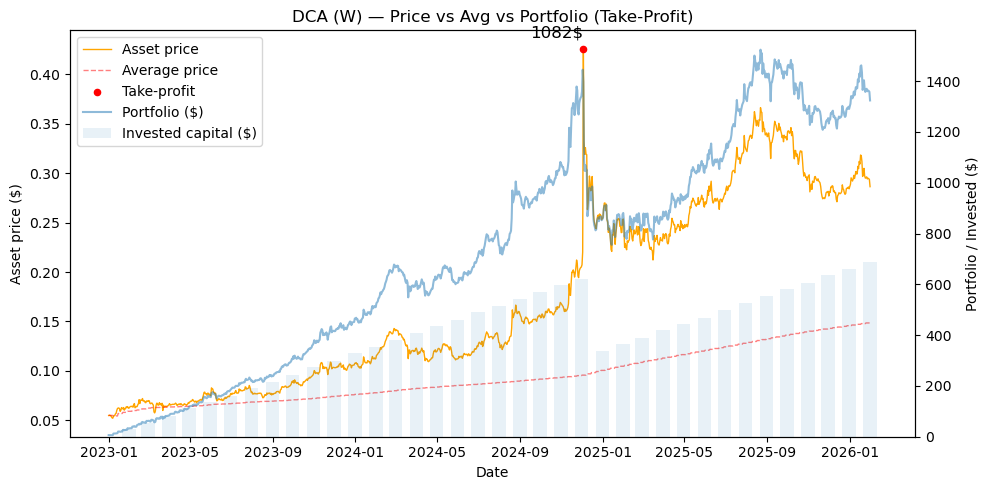

========== ADA ==========


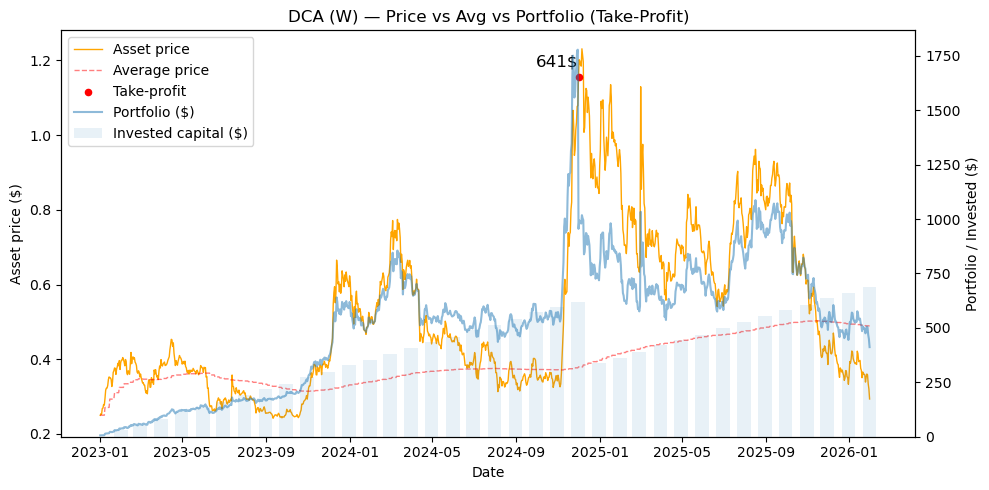

========== XMR ==========


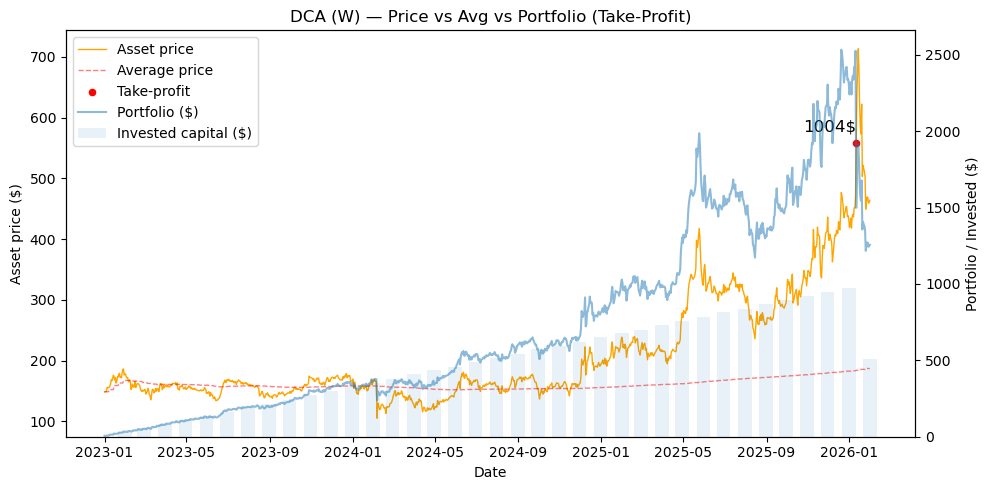

========== LINK ==========


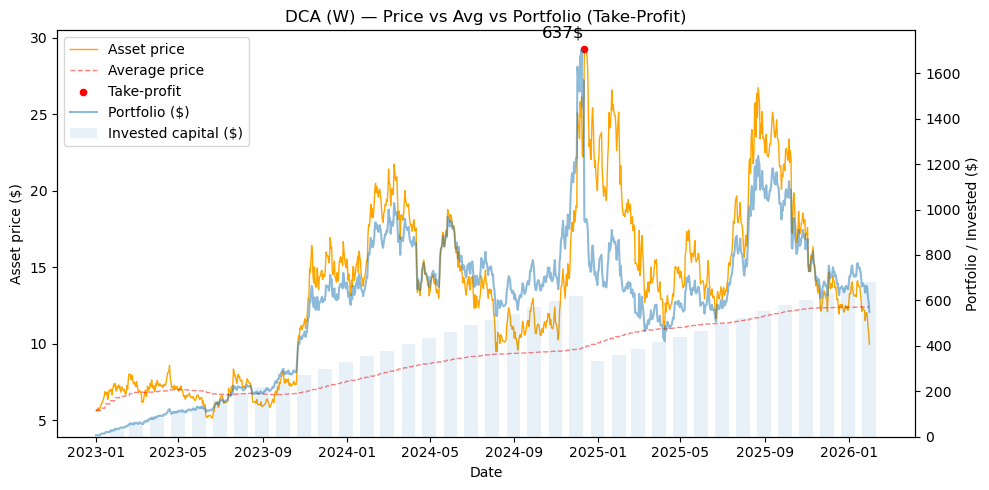

========== AVAX ==========


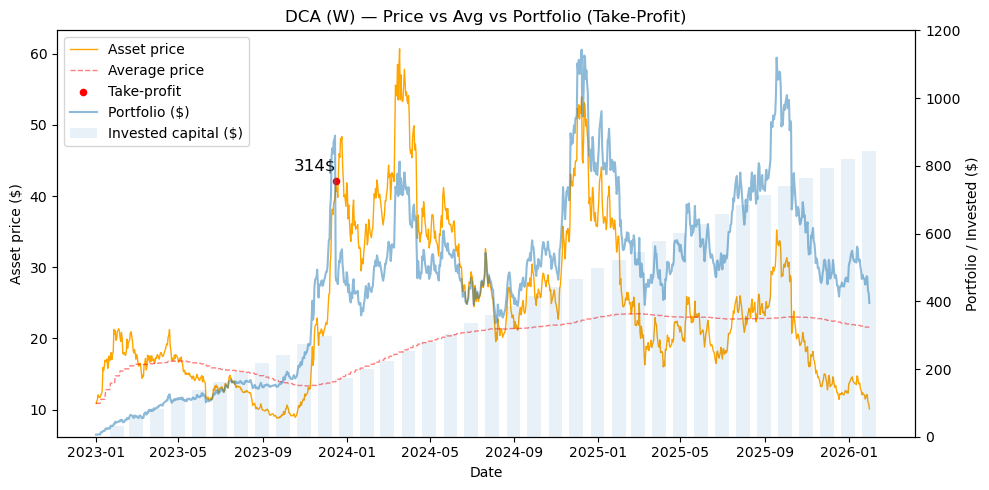

In [31]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 10_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    print("=" * 10, symbol, "=" * 10)

    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W",
        available_sum=1_000_000,
        fee=0.001,
        cooldown_days=180,
        profit_multiple=3,
        plot=True
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [32]:
results = pd.DataFrame(res).T

In [33]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_returns,Total_equity,Num_take_profits
XMR,999,1256,1003,1497,2753,1
TRON,999,1323,1081,1395,2718,1
XRP,999,695,1281,1828,2523,2
BNB,999,958,921,1372,2330,1
SOL,999,522,1106,1555,2077,3
BTC,999,1610,0,0,1610,0
LINK,999,549,636,953,1502,1
ADA,999,411,640,954,1365,1
ETH,999,1021,0,0,1021,0
AVAX,999,395,314,469,864,1


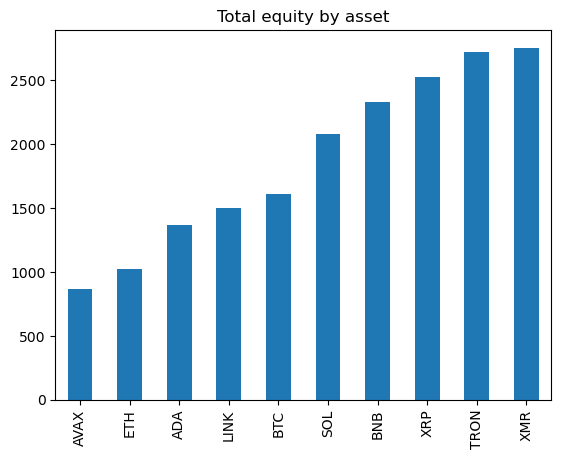

In [34]:
results['Total_equity'].sort_values().plot(kind='bar', title='Total equity by asset');

In [35]:
total_spend = results['Cash_spent'].sum()
total_equity = results['Total_equity'].sum()
total_profit = results['Realized_profit'].sum()

profit = total_equity - total_spend
lift = profit / total_spend * 100

print(f"Total spent: ${total_spend:,.0f}")
print(f"Total equity: ${total_equity:,.0f}")
print(f"Total profit: ${profit:,.0f}")
print(f"Lift per year: {lift:.2f}%")

Total spent: $9,990
Total equity: $18,763
Total profit: $8,773
Lift per year: 87.82%


In [36]:
results.index.tolist()

['BTC', 'ETH', 'BNB', 'XRP', 'SOL', 'TRON', 'ADA', 'XMR', 'LINK', 'AVAX']